In [2]:
import pandas as pd

In [3]:
airports = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airports.csv')
airport_freq = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airport-frequencies.csv')
runways = pd.read_csv('https://davidmegginson.github.io/ourairports-data/runways.csv')

In [4]:
airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75035,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
75036,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
75037,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,87TX,NaN,87TX,NaN,NaN,NaN
75038,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,no,NaN,NaN,NaN,NaN,NaN,"ZZZW, ZZZW, ZYW, YK96"


In [5]:
airport_freq

,id,airport_ref,airport_ident,type,description,frequency_mhz
0,70518,6528,00CA,CTAF,CTAF,122.900
1,307581,6589,01FL,ARCAL,NaN,122.900
2,75239,6589,01FL,CTAF,CEDAR KNOLL TRAFFIC,122.800
3,60191,6756,04CA,CTAF,CTAF,122.900
4,59287,6779,04MS,UNIC,UNICOM,122.800
...,...,...,...,...,...,...
29146,354818,27243,ZYTX,DEL,Taoxian Delivery,121.675
29147,354820,27243,ZYTX,GND,Taoxian Ground,121.900
29148,354819,27243,ZYTX,GND,Taoxian Apron,121.950
29149,51244,27243,ZYTX,TWR,SHENYANG TWR,118.100


In [6]:
airports.groupby(['iso_country', 'type']).size().to_frame('size').reset_index().sort_values(['iso_country', 'size'], ascending=[True, False])

,iso_country,type,size
1,AD,heliport,2
0,AD,closed,1
3,AE,heliport,200
7,AE,small_airport,30
5,AE,medium_airport,7
...,...,...,...
973,ZW,small_airport,135
972,ZW,medium_airport,8
969,ZW,closed,6
970,ZW,heliport,5


In [7]:
airports[airports['iso_country'] == 'US'].groupby('type').filter(lambda x: len(x) > 1000).groupby('type').size().sort_values(ascending=False)

type
small_airport    14861
heliport          7819
closed            5795
dtype: int64

In [8]:
by_country = airports.groupby('iso_country').size().to_frame('size').reset_index().rename({'size': 'airport_count'}, axis=1)

In [9]:
by_country

,iso_country,airport_count
0,AD,3
1,AE,248
2,AF,78
3,AG,6
4,AI,2
...,...,...
239,YE,38
240,YT,1
241,ZA,645
242,ZM,123


In [10]:
by_country.nlargest(20, columns='airport_count').tail(10)

,iso_country,airport_count
72,FR,993
9,AR,941
107,IT,850
46,CO,728
173,PH,688
45,CN,682
241,ZA,645
172,PG,612
102,IN,607
231,VE,601


In [11]:
runways.head(3)

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,01,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [12]:
runways.agg({'length_ft': ['max', 'min', 'mean', 'median']}).T

,max,min,mean,median
length_ft,30000.0,0.0,3253.647171,2700.0


In [13]:
r = runways['length_ft']

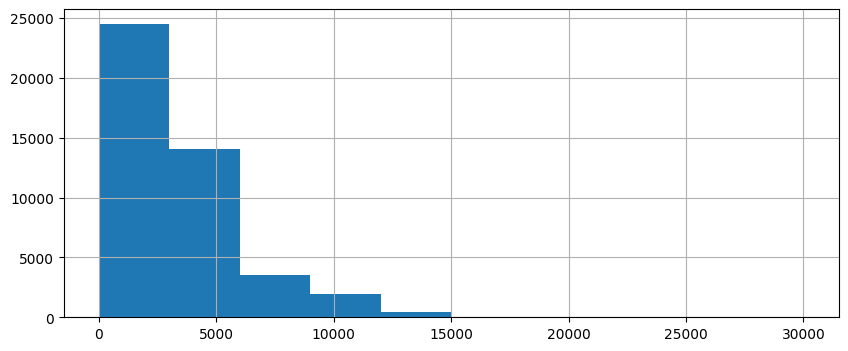

In [14]:
r.hist(figsize=(10, 4));

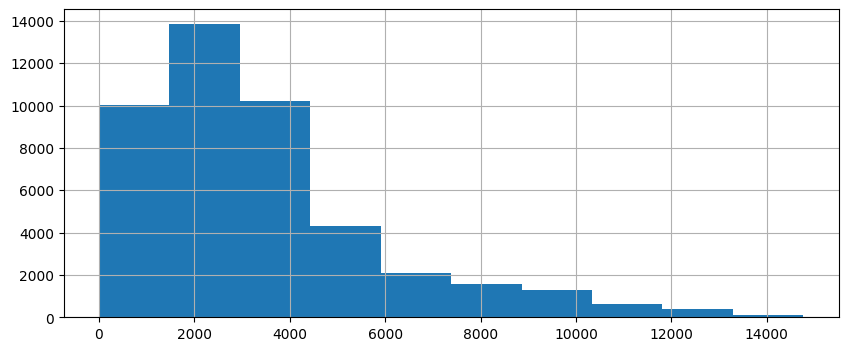

In [15]:
r[r < 15000].hist(figsize=(10, 4));

In [16]:
airport_freq.merge(airports[airports.ident == 'KLAX']['id'], left_on='airport_ref', right_on='id', how='inner')[['airport_ident', 'type', 'description', 'frequency_mhz']]

,airport_ident,type,description,frequency_mhz
0,KLAX,APP,SOCAL APP,36.07
1,KLAX,APP,SOCAL APP,124.30
2,KLAX,ATIS,ATIS,133.80
3,KLAX,CLD,CLNC DEL,121.40
4,KLAX,DEP,SOCAL DEP,124.30
5,KLAX,GND,GND,121.65
6,KLAX,MISC,CG,34.50
7,KLAX,MISC,CG,898.40
8,KLAX,OPS,AF,37.22
9,KLAX,TWR,TWR,119.80


In [17]:
pd.concat([airports[airports['ident'] == 'KLAX'][['name', 'municipality']], airports[airports['ident'] == 'KLGB'][['name', 'municipality']]])

,name,municipality
36449,Los Angeles International Airport,Los Angeles
36475,Long Beach Airport (Daugherty Field),Long Beach


In [18]:
df1 = pd.DataFrame({'id': [1, 2], 'name': ['Harry Potter', 'Ron Weasley']})

In [19]:
df2 = pd.DataFrame({'id': [3], 'name': ['Hermione Granger']})

In [39]:
df1

,id,name
0,1,Harry Potter
1,2,Ron Weasley


In [21]:
df2

,id,name
0,3,Hermione Granger


In [24]:
pd.concat([df1, df2]).reset_index(drop=True)

,id,name
0,1,Harry Potter
1,2,Ron Weasley
2,3,Hermione Granger
